# Weather Api

The weather Api is a python script used to retrieve weather data across the world for one day.

In [1]:
#import dependencies
import pandas as pd
import json
import requests as req
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import datetime
import seaborn as sns


In [2]:
#enter the api key
api_key = "0b64dd1f2c2190bbed796f9a0d13d58b"
#url for the api 
url = "http://api.openweathermap.org/data/2.5/weather?appid=0b64dd1f2c2190bbed796f9a0d13d58b&units=metric&q="
city_details=pd.DataFrame()
city_details["Latitude"]=[np.random.uniform(-90,90) for x in range(1000)]
city_details["Longitude"]=[np.random.uniform(-180, 180) for x in range(1000)]
city_details["City"]=""
city_details["Country"]=""
city_details["Cloudiness"]=""
city_details["Date"]=""
city_details["Humidity"]=""
city_details["Max Temp"]=""
city_details["Wind Speed"]=""

In [3]:
print("Begin Retrieving City details....")
for index,row in city_details.iterrows():
    try:
        lat=row["Latitude"]
        lon=row["Longitude"]
        city=citipy.nearest_city(lat, lon).city_name
        
        country=citipy.nearest_city(lat, lon).country_code
        
        if country+city not in city_details.Country.values+city_details.City.values: 
            city_details.set_value(index,"City",city)
            city_details.set_value(index,"Country",country)
            print("Retrieving City %s" % city)
            
    except:
        print("Skipping")
city_details=city_details.loc[city_details["City"]!=""]
city_details=city_details.reset_index(drop=True)
print("End Retreiving City Details")


Begin Retrieving City details....
Retrieving City ushuaia
Retrieving City stranraer
Retrieving City illoqqortoormiut
Retrieving City albany
Retrieving City lebu
Retrieving City hithadhoo
Retrieving City yellowknife
Retrieving City komsomolskiy
Retrieving City port alfred
Retrieving City nago
Retrieving City deputatskiy
Retrieving City aswan
Retrieving City puerto ayora
Retrieving City sosnovo-ozerskoye
Retrieving City bredasdorp
Retrieving City luderitz
Retrieving City thompson
Retrieving City kamenskoye
Retrieving City cape town
Retrieving City kaitangata
Retrieving City punta arenas
Retrieving City kapaa
Retrieving City saint-marc
Retrieving City brae
Retrieving City pokaran
Retrieving City chuy
Retrieving City mataura
Retrieving City hobart
Retrieving City mar del plata
Retrieving City samusu
Retrieving City amderma
Retrieving City innisfail
Retrieving City barentsburg
Retrieving City bluff
Retrieving City butaritari
Retrieving City kodiak
Retrieving City lagoa
Retrieving City labuh

In [4]:
print("Begin Retrieving City details....")
for index,row in city_details.iterrows():
    target_url=url+row["City"]+","+row["Country"]
    #print(target_url)
    i=0
    response=req.get(target_url).json()
    
    try:
        print("Retrieving City Weather %s" % row["City"])
        city_details.set_value(index,"Cloudiness",response["clouds"]["all"])
        city_details.set_value(index,"Date",datetime.datetime.fromtimestamp(int(response["dt"])).strftime('%Y-%m-%d %H:%M:%S'))
        city_details.set_value(index,"Humidity",response["main"]["humidity"])
        city_details.set_value(index,"Max Temp",response["main"]["temp_max"])
        city_details.set_value(index,"Wind Speed",response["wind"]["speed"])
    except:
        print("Skip",i)
        i+=1
print("End Retreiving City Details")        

Begin Retrieving City details....
Retrieving City Weather ushuaia
Retrieving City Weather stranraer
Retrieving City Weather illoqqortoormiut
Skip 0
Retrieving City Weather albany
Retrieving City Weather lebu
Retrieving City Weather hithadhoo
Retrieving City Weather yellowknife
Retrieving City Weather komsomolskiy
Retrieving City Weather port alfred
Retrieving City Weather nago
Retrieving City Weather deputatskiy
Retrieving City Weather aswan
Retrieving City Weather puerto ayora
Retrieving City Weather sosnovo-ozerskoye
Retrieving City Weather bredasdorp
Retrieving City Weather luderitz
Retrieving City Weather thompson
Retrieving City Weather kamenskoye
Skip 0
Retrieving City Weather cape town
Retrieving City Weather kaitangata
Skip 0
Retrieving City Weather punta arenas
Retrieving City Weather kapaa
Retrieving City Weather saint-marc
Retrieving City Weather brae
Retrieving City Weather pokaran
Retrieving City Weather chuy
Retrieving City Weather mataura
Skip 0
Retrieving City Weather h

Retrieving City Weather vieux-habitants
Retrieving City Weather ciras
Skip 0
Retrieving City Weather markova
Skip 0
Retrieving City Weather provideniya
Retrieving City Weather dong hoi
Retrieving City Weather ilulissat
Retrieving City Weather urdzhar
Skip 0
Retrieving City Weather kandrian
Retrieving City Weather ancud
Retrieving City Weather nacala
Skip 0
Retrieving City Weather shache
Retrieving City Weather hyeres
Retrieving City Weather gat
Skip 0
Retrieving City Weather general roca
Retrieving City Weather nishihara
Retrieving City Weather salalah
Retrieving City Weather valcourt
Retrieving City Weather chandur bazar
Retrieving City Weather bastia
Retrieving City Weather kahta
Retrieving City Weather fairbanks
Retrieving City Weather farah
Retrieving City Weather coari
Retrieving City Weather kleck
Skip 0
Retrieving City Weather pierre
Retrieving City Weather arsk
Retrieving City Weather jega
Retrieving City Weather surt
Retrieving City Weather bengbu
Retrieving City Weather cap m

In [5]:
city_details=city_details.loc[city_details["Date"]!=""]
city_details=city_details.reset_index(drop=True)
city_details.head()


,Latitude,Longitude,City,Country,Cloudiness,Date,Humidity,Max Temp,Wind Speed
0,-79.283884,-48.145848,ushuaia,ar,40,2017-12-20 19:00:00,61,10,5.7
1,54.820215,-4.961674,stranraer,gb,92,2017-12-20 19:50:00,100,8,1.5
2,-69.839876,102.867879,albany,au,24,2017-12-20 19:58:24,68,17.92,2.77
3,-30.155715,-92.662871,lebu,cl,0,2017-12-20 19:58:13,94,13.42,7.47
4,-11.367844,67.417284,hithadhoo,mv,36,2017-12-20 19:58:48,100,27.97,1.92


In [31]:
plot_list=["Max Temp","Humidity","Cloudiness","Wind Speed"]
labels={"Max Temp":"Maximum Temprateure (F)",
       "Humidity":"Humidity %",
       "Cloudiness":"Cloudiness %",
       "Wind Speed":"Wind Speed (m/s)"}
# Build a scatter plot City Latitude vs. Temperature
#for y in plot_list:
def plot_graph_details(y):
    date_rep=city_details["Date"].max().split(" ")[0]
    sns.set_style('ticks')
    sns.set(style="darkgrid")
    fig, ax = plt.subplots(figsize=(20,10))
    plt.rc('font', size=16,weight="bold")
    p = sns.regplot(x="Latitude", y=y, data=city_details, fit_reg=False).set_title('%s by Latitude(%s)'% (y,date_rep))
     
    plt.ylabel(labels[y])
    #plt.rc('font', size=16,weight="bold")
    # Save the figure
    plt.savefig('%s by Latitude(%s)'% (y,date_rep)+"png")
    return plt
    # Show plot
  #  plt.show()

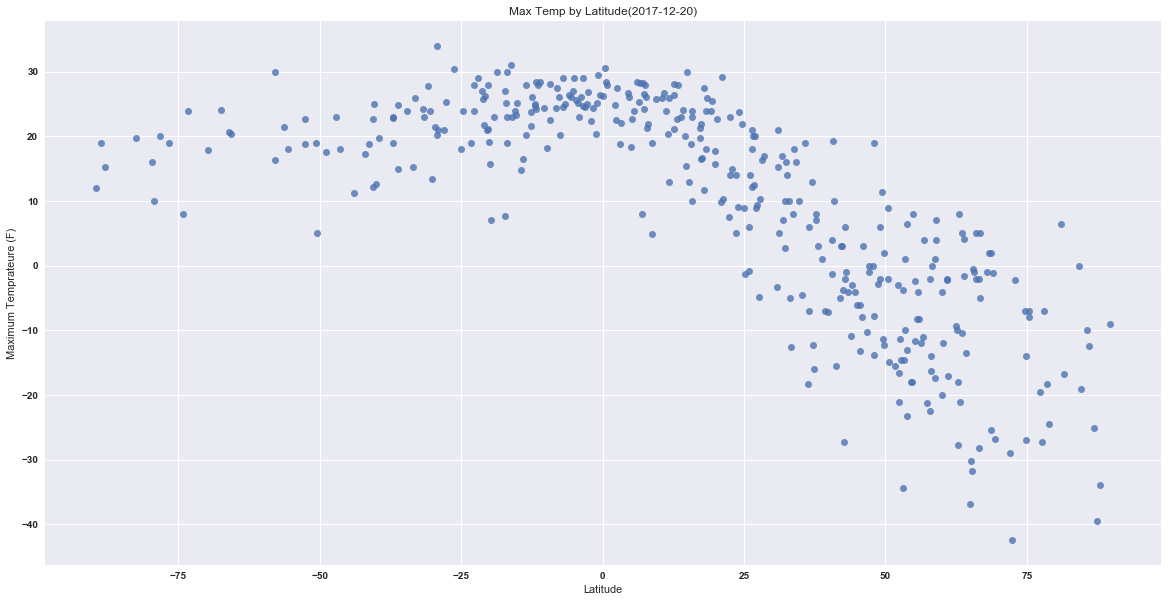

In [32]:
plt=plot_graph_details("Max Temp")
plt.show()

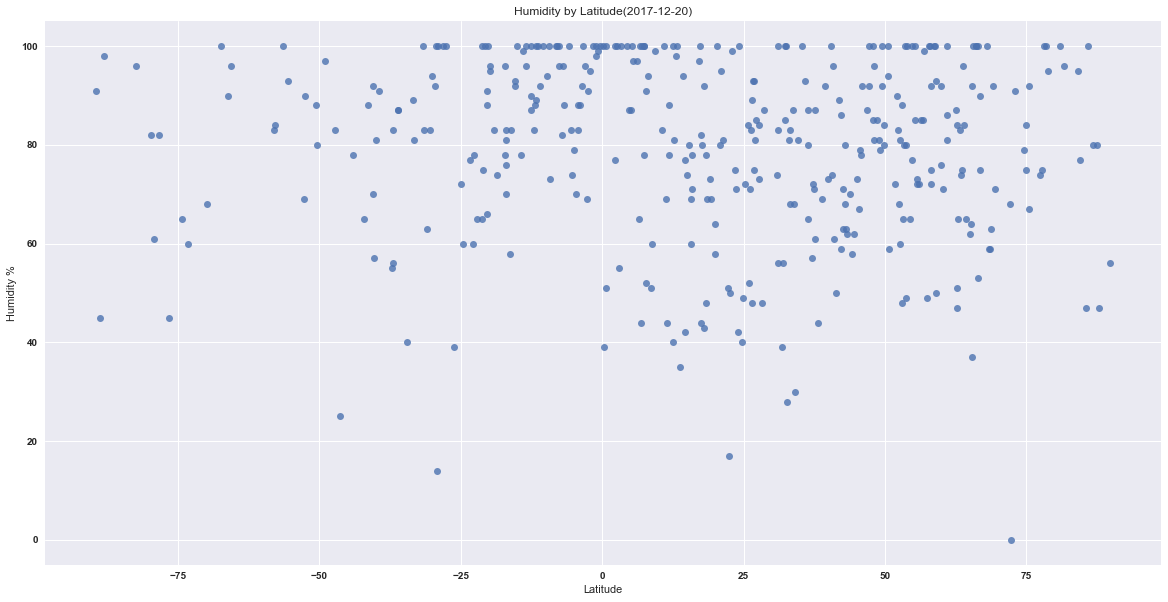

In [33]:
plt=plot_graph_details("Humidity")
plt.show()

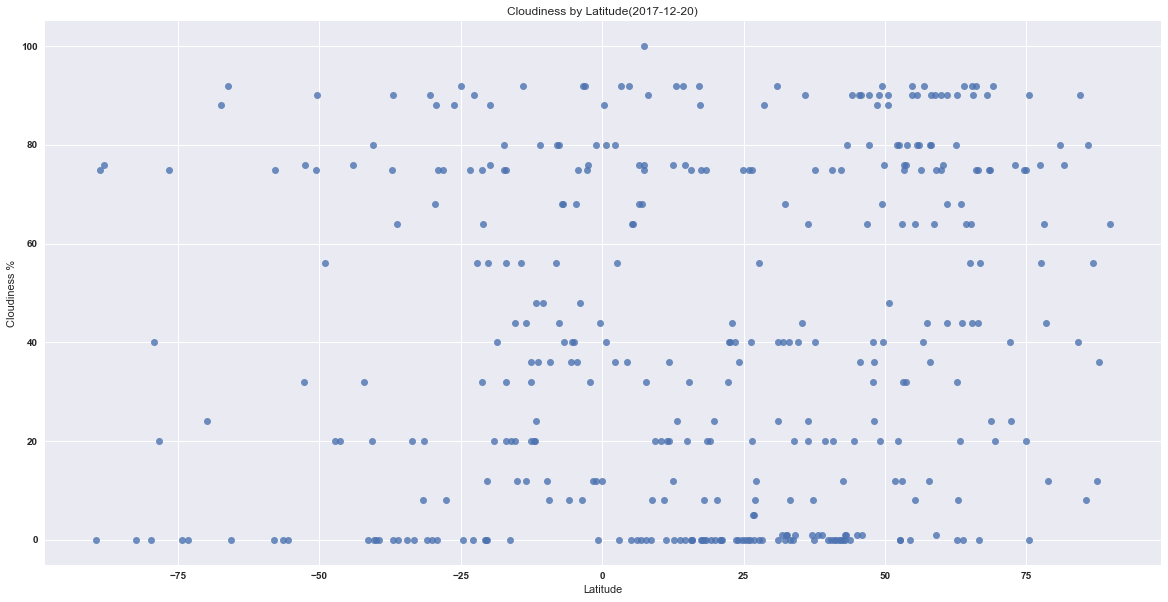

In [34]:
plt=plot_graph_details("Cloudiness")
plt.show()

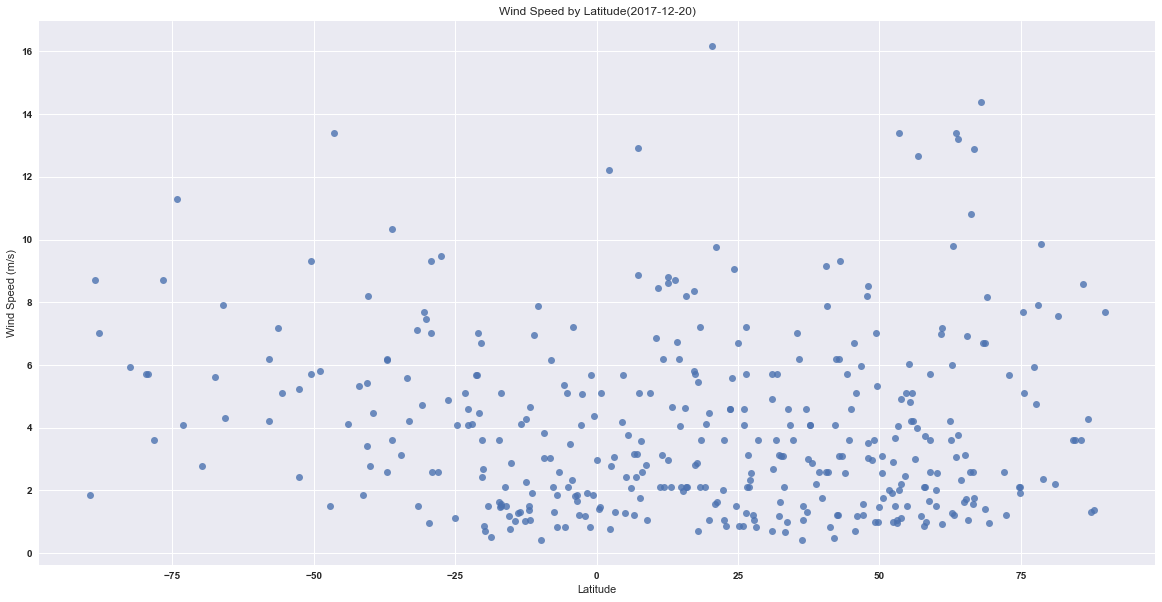

In [35]:
plt=plot_graph_details("Wind Speed")
plt.show()